# Workshop: Recommender Systems

<div>
<img src="https://developer-blogs.nvidia.com/wp-content/uploads/2021/04/Whats-recommendation-system_Pic-2.png" width="590"/>
<img src="https://developer-blogs.nvidia.com/wp-content/uploads/2021/04/whats-recommendation_Pic0.png" width="500"/>
</div>


Image sources: https://www.nvidia.com/en-us/glossary/data-science/recommendation-system/


<div>
<img src="https://storage.googleapis.com/lds-media/images/cosine-similarity-vectors.original.jpg" width="700"/>
       
 <br>
<img src="https://www.oreilly.com/api/v2/epubs/9781788993753/files/assets/848e2bba-80ee-4352-94ed-ddbc3997b56a.png" width="300"/>
    
<br>
<img src="http://researchdatapod.com/wp-content/uploads/2021/11/Screenshot-2021-11-27-at-16.01.30-1024x354.png" width="600"/>
</div>




## Read Data

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
ls

drive/  links.csv  movies.csv  ratings.csv  sample_data/  tags.csv


In [12]:
cd /content/drive/MyDrive/MyWorkshop/Lecure13-RecommendSys

/content/drive/MyDrive/MyWorkshop/Lecure13-RecommendSys


In [14]:
import pandas as pd
# Load the MovieLens dataset (you can download it from https://grouplens.org/datasets/movielens/)
# For this example, we'll use the small dataset
movies = pd.read_csv('ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')

In [15]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [16]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [17]:
print(ratings.shape)
print(movies.shape)

(100836, 4)
(9742, 3)


## Merge movies and ratings data

In [18]:
movie_ratings = pd.merge(ratings, movies, on='movieId')
print(movie_ratings.shape)
movie_ratings.head()

(100836, 6)


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


## Create a user-item matrix

In [19]:
user_movie_ratings = movie_ratings.pivot_table(index='userId', columns='title', values='rating')
user_movie_ratings.tail()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN
609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
610,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,...,NaN,4.0,3.5,3.0,NaN,NaN,2.0,1.5,NaN,NaN


### Fill NaN values with 0 (assuming no rating means a rating of 0)

In [20]:
user_movie_ratings = user_movie_ratings.fillna(0)
user_movie_ratings.tail()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.5,3.5,0.0,0.0,0.0
609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
610,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,...,0.0,4.0,3.5,3.0,0.0,0.0,2.0,1.5,0.0,0.0


## Calculate cosine similarity between users

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(user_movie_ratings)

In [22]:
user_similarity.shape

(610, 610)

### Convert the similarity matrix into a DataFrame

In [23]:

user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_ratings.index, columns=user_movie_ratings.index)

In [24]:
user_similarity_df.head(3)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.05972,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.00000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.00000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119


## Reccommend items for a user

In [25]:
user_id = 1

### Sort similar users based on cosine similarity

In [26]:
similar_users = user_similarity_df.loc[user_id].sort_values(ascending=False).index[1:]
similar_users

Index([266, 313, 368,  57,  91, 469,  39, 288, 452,  45,
       ...
       184, 245, 358, 496, 397, 578, 506, 175, 556, 306],
      dtype='int64', name='userId', length=609)

### Define vector user_ratings of user_id

In [33]:
# rating ที่มากกว่า 0 แสดงว่าเคยดูแล้ว
user_ratings = user_movie_ratings.loc[user_id]
print(user_ratings)

title
'71 (2014)                                   0.0
'Hellboy': The Seeds of Creation (2004)      0.0
'Round Midnight (1986)                       0.0
'Salem's Lot (2004)                          0.0
'Til There Was You (1997)                    0.0
                                            ... 
eXistenZ (1999)                              0.0
xXx (2002)                                   0.0
xXx: State of the Union (2005)               0.0
¡Three Amigos! (1986)                        4.0
À nous la liberté (Freedom for Us) (1931)    0.0
Name: 1, Length: 9719, dtype: float64


### Create list of top 10 reccomend moviess with the order of other similar users

- select the movies with rating > 3 and

- user never rating (user_ratings==0)


In [34]:
recommendations = []
for other_user in similar_users:
    other_user_ratings = user_movie_ratings.loc[other_user]

    movies_rating = other_user_ratings[(other_user_ratings >3) & (user_ratings==0)]
    movies = movies_rating.sort_values(ascending=False).index
    recommendations.extend(movies)
    if len(recommendations)>10:
        break;

recommendations[:10]

['2001: A Space Odyssey (1968)',
 'Fisher King, The (1991)',
 'Hard-Boiled (Lat sau san taam) (1992)',
 'Aliens (1986)',
 'Hunt for Red October, The (1990)',
 'Producers, The (1968)',
 'Raising Arizona (1987)',
 'Real Genius (1985)',
 'Ref, The (1994)',
 'Roger & Me (1989)']

## Define Function for Recommendation and Write as file

In [36]:
%%writefile myfunction_67130701713.py
# Function to get movie recommendations for a user
def get_movie_recommendations(user_id, user_similarity_df, user_movie_ratings, n_recommendations):
    similar_users = user_similarity_df.loc[user_id].sort_values(ascending=False).index[1:]
    user_ratings = user_movie_ratings.loc[user_id]

    recommendations = []
    for other_user in similar_users:
        other_user_ratings = user_movie_ratings.loc[other_user]

        movies_rating = other_user_ratings[(other_user_ratings >3) & (user_ratings==0)]
        movies = movies_rating.sort_values(ascending=False).index
        recommendations.extend(movies)
        if len(recommendations)>n_recommendations:
            break;

    return recommendations[:n_recommendations]  # Return top n recommendations



Writing myfunction_67130701713.py


## Save Recommendation Data: user_similarity_df, user_movie_ratings

In [38]:
import pickle

# Save data to a file
with open('67130701713recommendation_usersim.pkl', 'wb') as file:
    data_to_save = [user_similarity_df, user_movie_ratings]
    pickle.dump(data_to_save, file)

## Import the defined function and Load Recommendation Data

Runtime - > Restart runtime

In [1]:
ls

drive/  links.csv  movies.csv  ratings.csv  sample_data/  tags.csv


In [2]:
cd /content/drive/MyDrive/MyWorkshop/Lecure13-RecommendSys

/content/drive/MyDrive/MyWorkshop/Lecure13-RecommendSys


In [3]:
ls

67130701713recommendation_usersim.pkl            myfunction_67130701713.py
67130701713-WorkshopRecommendSys-1-67-std.ipynb  recommSysMovie-67xxxx.docx
ml-latest-small/


In [4]:
from myfunction_67130701713 import get_movie_recommendations
import pickle

In [5]:
# Load data back from the file
with open('67130701713recommendation_usersim.pkl', 'rb') as file:
    user_similarity_df, user_movie_ratings = pickle.load(file)

In [6]:
# Example: Get recommendations for a user
user_id = 1
recommendations = get_movie_recommendations(user_id, user_similarity_df, user_movie_ratings, 10)

print(f"Top 10 movie recommendations for User {user_id}:")
for movie_title in recommendations:
    print("          " + movie_title)

Top 10 movie recommendations for User 1:
          2001: A Space Odyssey (1968)
          Fisher King, The (1991)
          Hard-Boiled (Lat sau san taam) (1992)
          Aliens (1986)
          Hunt for Red October, The (1990)
          Producers, The (1968)
          Raising Arizona (1987)
          Real Genius (1985)
          Ref, The (1994)
          Roger & Me (1989)


# SVD  for recommender systems

<div>

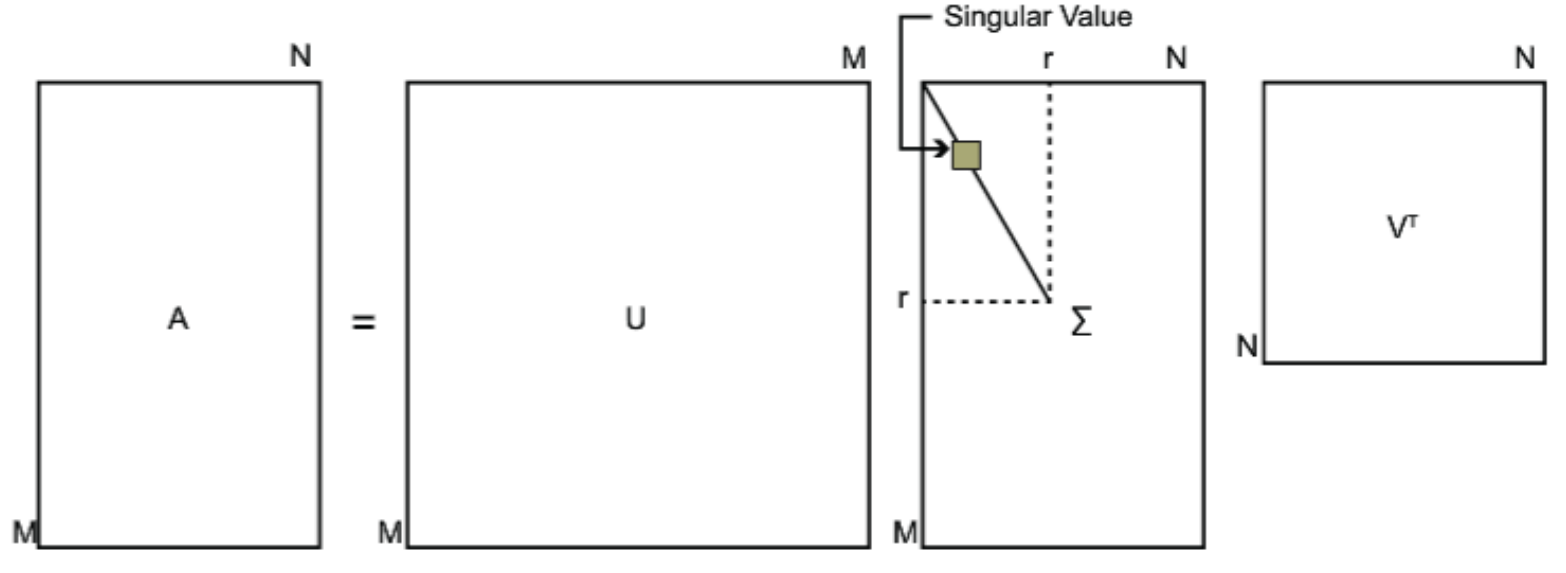
 <br>
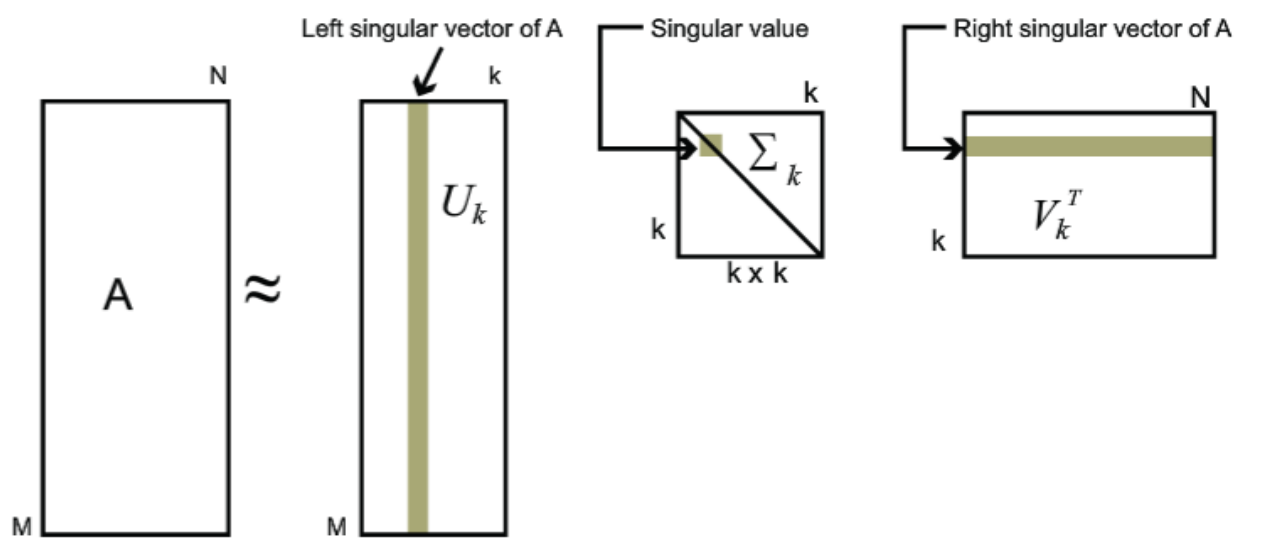

    
</div>



<div>
<img src="https://eugeneyan.com/assets/og_image/matrix-factorization.jpg" width="700"/>
 <br>
<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*b4M7o7W8bfRRxdMxtFoVBQ.png" width="700"/>
    
</div>

<div>
<img src="https://www.researchgate.net/publication/323149658/figure/fig1/AS:1086420324220954@1636034198137/The-Funk-SVD-decomposition-model.jpg" width="700"/>
 <br>
   
</div>

Document of Surprise:

https://surprise.readthedocs.io/en/stable/getting_started.html

## Read Data

In [8]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357278 sha256=b49276304dcee9780a929e4e82aaebf2e8ce1702fb13425ff7d79c274fc91701
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [9]:
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy

# Load the MovieLens dataset (ml-latest-small)
movies = pd.read_csv('ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')

## Create UserID, ItemID, Rating

In [10]:
# Merge movies and ratings data
movie_ratings = pd.merge(ratings, movies, on='movieId')

In [11]:
movie_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


## Prepare Data for Surprise

In [12]:
# Create a Surprise Reader
reader = Reader(rating_scale=(1, 5))

In [13]:
# Load the data into Surprise Dataset
data = Dataset.load_from_df(movie_ratings[['userId', 'movieId', 'rating']], reader)


## Find optimal number of factors

In [14]:
from surprise.model_selection import cross_validate
import numpy as np

# Define factor options
factor_options = [2, 5, 10, 20, 30, 50, 100]
results = {}

# Train and evaluate models with different numbers of factors
for n_factors in factor_options:
    algo = SVD(n_factors=n_factors)
    cv_results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)
    avg_rmse = np.mean(cv_results['test_rmse'])
    results[n_factors] = avg_rmse
    print(f"Factors: {n_factors}, RMSE: {avg_rmse}")

# Optimal number of factors
optimal_factors = min(results, key=results.get)
print(f"Optimal number of factors: {optimal_factors}")

Factors: 2, RMSE: 0.8692985707213513
Factors: 5, RMSE: 0.8697472958285781
Factors: 10, RMSE: 0.8701777489004524
Factors: 20, RMSE: 0.8700573804858154
Factors: 30, RMSE: 0.8699678915391333
Factors: 50, RMSE: 0.8710190289631143
Factors: 100, RMSE: 0.8717534431215833
Optimal number of factors: 2


## Create model using SVD wiht optimal number of factors

In [15]:
# Use the SVD algorithm
svd_model = SVD(n_factors=2)

In [16]:
# Build a full training set
trainset = data.build_full_trainset()

In [17]:
# Train the algorithm on the training set
svd_model.fit(trainset)

In [19]:
svd_model.pu.shape

(610, 2)

In [20]:
svd_model.qi.shape

(9724, 2)

## Predict Rating for user and item

In [21]:
user_id = 15
movie_id = 1
pred = svd_model.predict(user_id, movie_id)
print(pred)

user: 15         item: 1          r_ui = None   est = 3.53   {'was_impossible': False}


## Get recommendations for a specific user

In [22]:
movie_ratings.head(3)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller


In [23]:
user_id = 1

In [24]:
rated_user_movies = movie_ratings[movie_ratings['userId'] == user_id]['movieId'].values

In [25]:
# Filter out movies the user has already rated
unrated_movies = movies[~movies['movieId'].isin(rated_user_movies)]['movieId']

In [26]:
unrated_movies

,movieId
1,2
3,4
4,5
6,7
7,8
...,...
9737,193581
9738,193583
9739,193585
9740,193587


In [27]:
# Make predictions for unrated movies
pred_rating = [svd_model.predict(user_id, movie_id) for movie_id in unrated_movies]

In [29]:
pred_rating

[Prediction(uid=1, iid=2, r_ui=None, est=4.28397368253973, details={'was_impossible': False}),
 Prediction(uid=1, iid=4, r_ui=None, est=3.7569264027275877, details={'was_impossible': False}),
 Prediction(uid=1, iid=5, r_ui=None, est=3.709088905031866, details={'was_impossible': False}),
 Prediction(uid=1, iid=7, r_ui=None, est=3.8547038636812094, details={'was_impossible': False}),
 Prediction(uid=1, iid=8, r_ui=None, est=3.8486242658207113, details={'was_impossible': False}),
 Prediction(uid=1, iid=9, r_ui=None, est=3.856532454057765, details={'was_impossible': False}),
 Prediction(uid=1, iid=10, r_ui=None, est=4.277609513447611, details={'was_impossible': False}),
 Prediction(uid=1, iid=11, r_ui=None, est=4.443582839161981, details={'was_impossible': False}),
 Prediction(uid=1, iid=12, r_ui=None, est=3.485359101531237, details={'was_impossible': False}),
 Prediction(uid=1, iid=13, r_ui=None, est=4.157107887424696, details={'was_impossible': False}),
 Prediction(uid=1, iid=14, r_ui=No

In [30]:
# Sort predictions by estimated rating in descending order
sorted_predictions = sorted(pred_rating, key=lambda x: x.est, reverse=True)

# Get top 10 movie recommendations
top_recommendations = sorted_predictions[:10]

# Print top recommendations
print(f"\nTop 10 movie recommendations for User {user_id}:")
for recommendation in top_recommendations:
    movie_title = movies[movies['movieId'] == recommendation.iid]['title'].values[0]
    print(f"{movie_title} (Estimated Rating: {recommendation.est})")


Top 10 movie recommendations for User 1:
Shawshank Redemption, The (1994) (Estimated Rating: 5)
Ghost in the Shell (Kôkaku kidôtai) (1995) (Estimated Rating: 5)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) (Estimated Rating: 5)
Godfather, The (1972) (Estimated Rating: 5)
Philadelphia Story, The (1940) (Estimated Rating: 5)
Rear Window (1954) (Estimated Rating: 5)
Casablanca (1942) (Estimated Rating: 5)
Streetcar Named Desire, A (1951) (Estimated Rating: 5)
Brazil (1985) (Estimated Rating: 5)
Lawrence of Arabia (1962) (Estimated Rating: 5)


## Save Recommendation Model & Data

In [31]:
import pickle

# Save data to a file
with open('67130701713recommendation_movie_svd.pkl', 'wb') as file:
    data_to_save = [svd_model, movie_ratings, movies]
    pickle.dump(data_to_save, file)

## Load Recommendation Model & Data

In [32]:
import pickle
# Load data back from the file
with open('67130701713recommendation_movie_svd.pkl', 'rb') as file:
    svd_model, movie_ratings, movies = pickle.load(file)


In [33]:
user_id = 1
rated_user_movies = movie_ratings[movie_ratings['userId'] == user_id]['movieId'].values
unrated_movies = movies[~movies['movieId'].isin(rated_user_movies)]['movieId']
pred_rating = [svd_model.predict(user_id, movie_id) for movie_id in unrated_movies]
# Sort predictions by estimated rating in descending order
sorted_predictions = sorted(pred_rating, key=lambda x: x.est, reverse=True)

# Get top 10 movie recommendations
top_recommendations = sorted_predictions[:10]

# Print top recommendations
print(f"\nTop 10 movie recommendations for User {user_id}:")
for recommendation in top_recommendations:
    movie_title = movies[movies['movieId'] == recommendation.iid]['title'].values[0]
    print(f"{movie_title} (Estimated Rating: {recommendation.est})")


Top 10 movie recommendations for User 1:
Shawshank Redemption, The (1994) (Estimated Rating: 5)
Ghost in the Shell (Kôkaku kidôtai) (1995) (Estimated Rating: 5)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) (Estimated Rating: 5)
Godfather, The (1972) (Estimated Rating: 5)
Philadelphia Story, The (1940) (Estimated Rating: 5)
Rear Window (1954) (Estimated Rating: 5)
Casablanca (1942) (Estimated Rating: 5)
Streetcar Named Desire, A (1951) (Estimated Rating: 5)
Brazil (1985) (Estimated Rating: 5)
Lawrence of Arabia (1962) (Estimated Rating: 5)


## Deploy on Streamlit Sharing

https://share.streamlit.io/

https://docs.streamlit.io/library/api-reference

https://github.com/



In [40]:
%%writefile app_rec_movie_67130701713.py

import streamlit as st
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

# Load the MovieLens dataset (ml-latest-small)
movies = pd.read_csv('ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')

# Create a Surprise Reader object
reader = Reader(rating_scale=(1, 5))

# Load data into Surprise Dataset
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Split data into training and testing sets
trainset, testset = train_test_split(data, test_size=.25)

# Train the SVD model
algo = SVD()
algo.fit(trainset)

# Function to get movie recommendations
def get_recommendations(user_id, top_n=10):
    # Get a list of movies the user has not rated
    user_ratings = ratings[ratings['userId'] == user_id]['movieId']
    unrated_movies = movies[~movies['movieId'].isin(user_ratings)]['movieId']

    # Predict ratings for unrated movies
    predictions = [algo.predict(user_id, movie_id).est for movie_id in unrated_movies]

    # Get top-N recommendations
    top_movie_ids = unrated_movies.iloc[pd.Series(predictions).sort_values(ascending=False).index[:top_n]]
    recommendations = movies[movies['movieId'].isin(top_movie_ids)]

    return recommendations

# Streamlit app
st.title("Movie Recommender System")

user_id = st.number_input("Enter User ID:", min_value=1, max_value=ratings['userId'].max(), value=1)

if st.button("Get Recommendations"):
    recommendations = get_recommendations(user_id)
    st.write("Top 10 recommendations for User ID", user_id)
    st.dataframe(recommendations[['title', 'genres']])



Overwriting app_rec_movie_67130701713.py


In [35]:
pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.10
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.19
albumentations                     1.4.20
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.20.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.28.0.34.7
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread        

In [37]:
pip install scikit-surprise

In [38]:
pip show scikit-surprise

Name: scikit-surprise
Version: 1.1.4
Summary: An easy-to-use library for recommender systems.
Home-page: https://surpriselib.com
Author: 
Author-email: Nicolas Hug <contact@nicolas-hug.com>
License: Copyright (c) 2016, Nicolas Hug
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        1. Redistributions of source code must retain the above copyright notice, this
           list of conditions and the following disclaimer.
        
        2. Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials provided with the distribution.
        
        3. Neither the name of the copyright holder nor the names of its contributors
           may be used to endorse or promote products derived from this softwa

In [41]:
%%writefile requirements.txt

pandas
scikit-surprise
streamlit


Overwriting requirements.txt
